# 결정트리

- (개정판)파이썬 라이브러리를 활용한 머신러닝, 한빛미디어, 2019.
    - 2.3.5 결정트리(decision tree)

## 공통

In [5]:
%config InlineBackend.figure_format = "retina"
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [7]:
from preamble import *

## 결정 트리를 활용한 회귀

### DT-Q5 결정트리를 사용해서 `ram_price`을 분석하여, 가격을 예측하세요.
- [ ] DT-Q5(a). pandas를 사용해서 "ram_price.csv" 파일을 `ram_prices` 객체를 생성하세요.

In [8]:
ram_prices = pd.read_csv("data/ram_price.csv")

ram_prices


,Unnamed: 0,date,price
0,0,1957.00,4.11e+08
1,1,1959.00,6.79e+07
2,2,1960.00,5.24e+06
3,3,1965.00,2.64e+06
4,4,1970.00,7.34e+05
...,...,...,...
328,328,2015.58,4.50e-03
329,329,2015.67,4.30e-03
330,330,2015.75,4.20e-03
331,331,2015.83,3.80e-03


- [ ] DT-Q5(b). `ram_prices` 변수를 `년도/가격` 그래프로 표현하세요.
    - y축의 지수에 `-`값을 표현할 수 없기 때문에 y축의 폰트를 `consolas`로 변경하세요.
    - x축과 y축에 label을 표시하세요("년" / "가격 ($/Mbyte)")
    - 일반적인 선 그래프를 사용하세요.   

In [ ]:
plt.plot(ram_prices.date, ram_prices.price)
plt.xlabel("년도")
plt.ylabel("가격 ($/Mbyte)")
plt.show()

- [ ] DT-Q5(c). `ram_prices` 변수를 `년도/가격` 그래프로 표현하세요.
    - 해당 그래프를 `log` 그래프로 변경하세요.

In [ ]:
plt.yticks(fontname = 'consolas')
#plt.plot(ram_prices.date, ram_prices.price)
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년도")
plt.ylabel("가격 ($/Mbyte)")
plt.show()

- [ ] DT-Q5(d). 학습데이터와 테스트 데이터를 분리하세요.
    - 학습 데이터는 1999년까지 데이터를 사용하세요.
    - 테스트 데이터는 1999년 이후 데이터를 사용하세요.

In [11]:
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

- [ ] DT-Q5(e). 학습데이터와 테스트 데이터를 분류하여 작성하세요.
    - y값은 log 함수를 적용하세요.

In [12]:
X_train = data_train.date.to_numpy()[:, np.newaxis]
y_train = np.log(data_train.price)

- [ ] DT-Q5(f). 결정트리의 회귀와 선형 회귀 예측기를 생성하고, 데이터에 학습을 진행하세요.
    - tree
    - linear_reg

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

- DT-Q5(g). 두 예측기에 테스트를 진행하세요.
    - 테스트에 사용되는 데이터는 모든 데이터를 활용하세요.

In [ ]:
X_all = ram_prices.date.to_numpy()[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

print(pred_tree, pred_lr)

- DT-Q5(h). 예측된 값을 기존값으로 변환하세요.

In [27]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

- DT-Q5(i). 기존 데이터와 예측 데이터 모두를 시각화하세요.

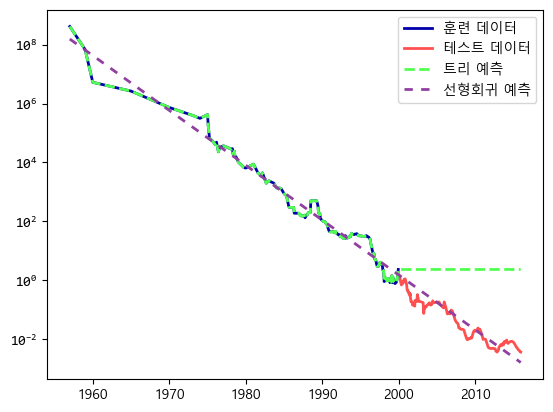

In [ ]:
plt.yticks(fontname = "consolas")
plt.semilogy(ram_prices.date, ram_prices.price, label = "RAW 데이터")
plt.semilogy(ram_prices.date, price_tree, label = "결정트리 예측 데이터")
plt.semilogy(ram_prices.date, price_lr, label = "선형 예측 데이터")
plt.xlabel("년도")
plt.ylabel("가격 ($/Mbyte)")
plt.legend()
plt.show()